회귀
   - 값을 예측

In [1]:
import numpy as np

In [2]:
length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

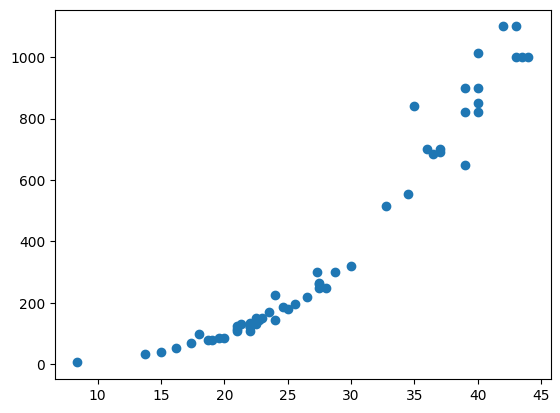

In [3]:
import matplotlib.pyplot as plt
plt.scatter(length,weight)
plt.show()

In [4]:
# 데이터분할

In [5]:
from sklearn.model_selection import train_test_split
length = length.reshape(-1,1)
weight = weight.reshape(-1,1)
x_train,x_test,y_train,y_test =  train_test_split(length,weight,random_state=45)
x_train.shape,  x_test.shape, y_train.shape,  y_test.shape

((42, 1), (14, 1), (42, 1), (14, 1))

In [6]:
#모델 선택
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
# 훈련
knr.fit(x_train,y_train)

KNeighborsRegressor()

In [7]:
#평가
knr.score(x_test,y_test)

0.980772279692558

In [8]:
# MAE로 평가 (Mean Absolute Error)
from sklearn.metrics import mean_absolute_error

In [9]:
y_pred = knr.predict(x_test)
mae =  mean_absolute_error(y_test, y_pred)
mae

37.15714285714286

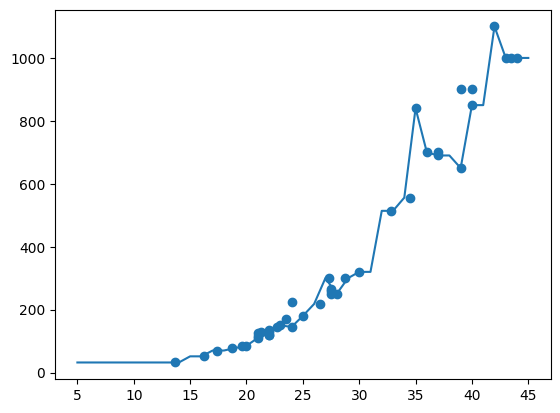

mae : 43.18571428571429


In [10]:
knr = KNeighborsRegressor(n_neighbors=1)
knr.fit(x_train,y_train)
plt.scatter(x_train,y_train)
# x축의 범위인 5 ~45의 데이터의 예측값을
x = np.arange(5,46).reshape(-1,1)
plt.plot(x, knr.predict(x))
plt.show()

y_pred = knr.predict(x_test)
mae =  mean_absolute_error(y_test, y_pred)
print(f'mae : {mae}')

In [11]:
# mae_max = float('-inf')
mae_min = float('inf')
min_n = 0
for n in range(1,40):
  knr = KNeighborsRegressor(n_neighbors=n)
  knr.fit(x_train,y_train)

  y_pred = knr.predict(x_test)
  mae =  mean_absolute_error(y_test, y_pred)
  if mae_min > mae:
    min_n = n
    mae_min = mae

In [12]:
min_n, mae_min

(4, 33.64107142857143)

------------------------------------

KNeighbors 알고리즘의 한계
  - 주변 데이터(거리기반)

In [13]:
# 하이퍼파라메터 튜닝의 결과로 모델을 다시 생성
n = 4
knr = KNeighborsRegressor(n_neighbors=n)
knr.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=4)

In [14]:
# 길이가 50일때 무게는?
knr.predict([[50]]),knr.predict([[100]]), knr.predict([[1000]])

(array([[1025.]]), array([[1025.]]), array([[1025.]]))

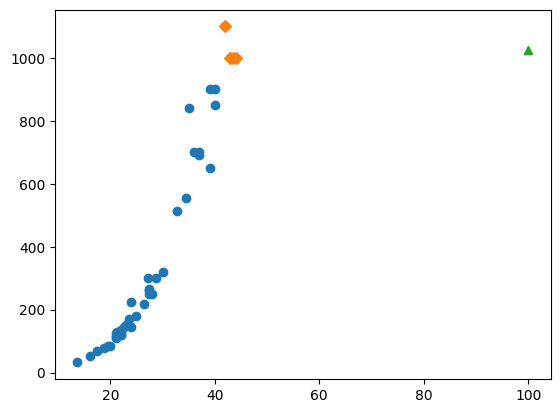

In [15]:
distance, indexdes = knr.kneighbors([[100]])
plt.scatter(x_train,y_train)
plt.scatter(x_train[indexdes],y_train[indexdes],marker='D')
plt.scatter(100,1025,marker='^')
plt.show()

선형회귀
  - LinearRegression

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.predict([[50]]),lr.predict([[100]]),lr.predict([[1000]])

(array([[1211.77995399]]), array([[3122.41654012]]), array([[37513.87509046]]))

In [17]:
# 기울기    절편
# y = ax + b
lr.coef_, lr.intercept_

(array([[38.21273172]]), array([-698.85663214]))

In [18]:
38.21273172*50-698.85663214

1211.7799538600002

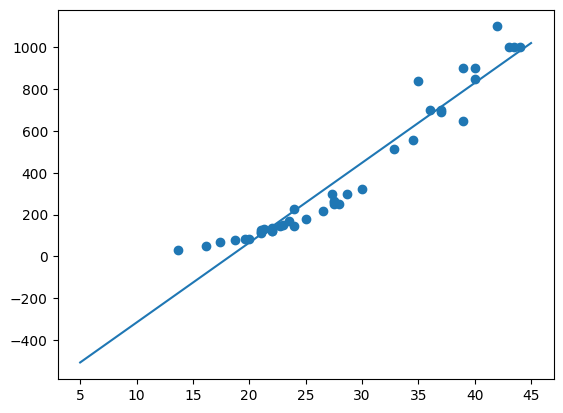

In [19]:
x = np.arange(5,46)
x_predict = lr.predict(x.reshape(-1,1))
plt.scatter(x_train,y_train)  # 실제 데이터
plt.plot(x,x_predict)  # 실제 데이터
plt.show()


다항회귀
  - 2차원 곡선
  - y = ax2 + bx + c

In [20]:
train_poly = np.column_stack((x_train**2, x_train))
test_poly = np.column_stack((x_test**2, x_test))

In [21]:
lr = LinearRegression()
lr.fit(train_poly,y_train)

LinearRegression()

In [22]:
train_poly[:5]

array([[ 400.  ,   20.  ],
       [ 756.25,   27.5 ],
       [ 484.  ,   22.  ],
       [1225.  ,   35.  ],
       [1369.  ,   37.  ]])

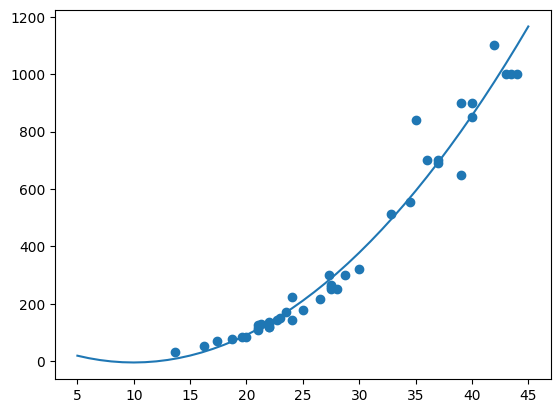

In [23]:
x = np.arange(5,46)
x_poly = np.column_stack((x**2,x))
x_predict = lr.predict(x_poly)
plt.scatter(x_train,y_train)  # 실제 데이터
plt.plot(x,x_predict)  # 실제 데이터
plt.show()

In [24]:
lr.score(test_poly,y_test)

0.9828287069682641

In [25]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, lr.predict(test_poly))

33.00700784791819

다항회귀로 데이터를 변환
  - PolynomialFeatures

In [26]:
from sklearn.preprocessing import PolynomialFeatures

In [48]:
x_train,x_test,y_train,y_test = train_test_split(length,weight,random_state=0)

In [49]:
# 사이킷런에서  모델일경우 fit->학습,   predict 예측
# 유틸리티의 경우 fit->규칙적용  transform->데이터 변환
poly = PolynomialFeatures()  # 기본이 2차
poly.fit(x_train)
x_train_poly = poly.transform(x_train)
x_test_poly = poly.transform(x_test)

In [50]:
# 모델
lr = LinearRegression()
lr.fit(x_train_poly, y_train)

LinearRegression()

In [51]:
# 학습데이터, 테스트데이터 평가
lr.score(x_train_poly, y_train), lr.score(x_test_poly, y_test)

(0.9734828103169649, 0.9624346725637883)

과적합 overfit
  - 특성이 한개뿐이라서 overfit이 발생할 확률이 적음

In [54]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(x_train)
x_train_poly = poly.transform(x_train)
x_test_poly = poly.transform(x_test)

lr = LinearRegression()
lr.fit(x_train_poly, y_train) # 학습
#평가
lr.score(x_train_poly,y_train), lr.score(x_test_poly, y_test)

(0.9822474682510883, 0.9279006724333276)